# Assignment 1 : Introduction to ML workflow and decision trees

**Group  15 :** 
*Sarvesh Meenowa, Neha Devi Shakya, Khushi Chitra Uday*

## Import libraries

In [ ]:
# General libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Task 1
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Task 3
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Task 4
from sklearn.base import BaseEstimator, RegressorMixin

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Task 1: A classification example: fetal heart condition diagnosis

### Step 1. Reading the data

In [ ]:
# Read the CSV file.
data = pd.read_csv("data/CTG.csv", skiprows = 1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Get a peek at the data
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


### Step 2. Training the baseline classifier

In [ ]:
clf = DummyClassifier(strategy='most_frequent')

In [ ]:
cross_val_score(clf, Xtrain, Ytrain).mean()

0.7805882352941176

### Step 3. Trying out some different classifiers

In [ ]:
#Instantiate all classifiers 

cart = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
perc = Perceptron(random_state = 42)
log_reg= LogisticRegression(random_state = 42,max_iter = 10000)
svc =  LinearSVC(random_state = 42)
mlp = MLPClassifier(random_state=42)


In [ ]:
#create list of classifiers
clfs =  [cart,rf,gbc,perc,log_reg,svc,mlp]

#select parameters for each one
param_cart  = {"criterion":["gini", "entropy"],"max_depth": range(1,30)}
param_rf = {"max_depth": range(1,30),
         "n_estimators":range(100,1000,200)}
param_gbc ={"learning_rate":[0.001,0.01,0.1], "n_estimators":[1000,1500,2000]}
param_perc = {"penalty":['l2','l1','elasticnet'],"alpha":[0.0001,0.01,0.1]}
param_log = {"C" : np.logspace(-4, 4, 25), "penalty" : ['l1', 'l2'],"solver":['liblinear']}
param_svc = {"penalty":['l1','l2']}

#The ith element represents the number of neurons in the ith hidden layer.                        
param_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}


In [ ]:
#list of params
params_list=[param_cart, param_rf, param_gbc, param_perc,param_log,param_svc,param_mlp]

In [ ]:
# Run gridsearch and use zip to attach each models to their parameters 
best_clf = ""
best_score = -1
best_parameters = {}
for clf, params in zip(clfs,params_list): 
    print(f"Testing parameters for {clf}")
    grid = GridSearchCV(estimator=clf, param_grid=params, verbose=0, cv=5).fit(Xtrain,Ytrain)
    if grid.best_score_ > best_score :
        best_clf = grid.best_estimator_
        best_score = grid.best_score_
        best_parameters = grid.best_params_

Testing parameters for DecisionTreeClassifier(random_state=42)
Testing parameters for RandomForestClassifier(random_state=42)
Testing parameters for GradientBoostingClassifier(random_state=42)
Testing parameters for Perceptron(random_state=42)
Testing parameters for LogisticRegression(max_iter=10000, random_state=42)
Testing parameters for LinearSVC(random_state=42)
Testing parameters for MLPClassifier(random_state=42)


In [ ]:
print('best estimator: ', best_clf)
print('best parameters:', best_parameters)
print('best score: ', best_score) 

best estimator:  GradientBoostingClassifier(n_estimators=2000, random_state=42)
best parameters: {'learning_rate': 0.1, 'n_estimators': 2000}
best score:  0.951764705882353


### Step 4. Final evaluation

In [ ]:
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1500)
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
accuracy_score(Ytest,Yguess)

0.9342723004694836

After performing GridSearch cross validation on a number of models, Gradient boosting had the best accuracy score of 95.1% on the training set and 93.4% on the test set


Gradient boosting classifier : 

Boosting algorithms constructs ensembles in a sequential way. The main idea is that it corrects the errors of the previous steps. Gradient boosting adds sub-models based on a gradient descent principle. It is a generalisation of Adaptive Boosting(AdaBoost).After each iteration, it verifies misclassified instances and the latter are given a greater importance. Gradient boosting always uses regression trees despite solving a classification problem.



## Task 2 

In [ ]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [ ]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [ ]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [ ]:
class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            # x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [ ]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [ ]:
def find_max_depth(depth_range, criterion, Xtrain, Xtest, Ytrain, Ytest):
    max_depth_list = list(range(depth_range))

    train_scores = [] # Log training cross validation scores for each model
    test_scores = [] # Log testing cross validation scores for each model

    for x in max_depth_list:
        clf = TreeClassifier(max_depth = x, criterion = criterion) 
        clf.fit(Xtrain, Ytrain)
        train_scores.append((cross_val_score(clf, Xtrain, Ytrain, cv = 5)).mean())
        test_scores.append((cross_val_score(clf, Xtest, Ytest, cv = 5)).mean())
    
    return (train_scores, test_scores)

In [ ]:
#Append the scores from applying the model with parameter max_depth(0-30) for criterion
depth_range = 31

maj_sum_scores = find_max_depth(depth_range, "maj_sum", Xtrain, Xtest, Ytrain, Ytest)
info_gain_scores = find_max_depth(depth_range, "info_gain", Xtrain, Xtest, Ytrain, Ytest)
gini_scores = find_max_depth(depth_range, "gini", Xtrain, Xtest, Ytrain, Ytest)

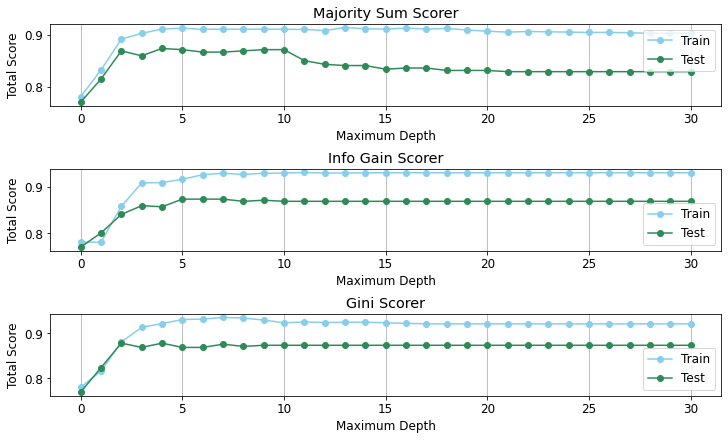

In [ ]:
x = np.arange(depth_range) # Create domain for plot
fig, ax = plt.subplots(3, figsize=(10, 6), constrained_layout = True)

ax[0].plot(x, maj_sum_scores[0], label = 'Train', color = 'skyblue', marker = 'o', markerfacecolor = 'skyblue') # Plot training score over domain
ax[0].plot(x, maj_sum_scores[1], label = 'Test', color = 'seagreen', marker = 'o', markerfacecolor = 'seagreen') # Plot testing accuracy over domain
ax[0].set_title('Majority Sum Scorer') # Title
ax[0].set_xlabel('Maximum Depth') # Label x-axis
ax[0].set_ylabel('Total Score') # Label y-axis
ax[0].legend() # Show plot labels as legend
ax[0].grid(axis = "x") # Show grid x-axis lines

ax[1].plot(x, info_gain_scores[0], label = 'Train', color = 'skyblue', marker = 'o', markerfacecolor = 'skyblue') # Plot training score over domain
ax[1].plot(x, info_gain_scores[1], label = 'Test', color = 'seagreen', marker = 'o', markerfacecolor = 'seagreen') # Plot testing accuracy over domain
ax[1].set_title('Info Gain Scorer') # Title
ax[1].set_xlabel('Maximum Depth') # Label x-axis
ax[1].set_ylabel('Total Score') # Label y-axis
ax[1].legend() # Show plot labels as legend
ax[1].grid(axis = "x") # Show grid x-axis lines

ax[2].plot(x, gini_scores[0], label = 'Train', color = 'skyblue', marker = 'o', markerfacecolor = 'skyblue') # Plot training score over domain
ax[2].plot(x, gini_scores[1], label = 'Test', color = 'seagreen', marker = 'o', markerfacecolor = 'seagreen') # Plot testing accuracy over domain
ax[2].set_title('Gini Scorer') # Title
ax[2].set_xlabel('Maximum Depth') # Label x-axis
ax[2].set_ylabel('Total Score') # Label y-axis
ax[2].legend() # Show plot labels as legend
ax[2].grid(axis = "x") # Show grid x-axis lines

plt.rcParams.update({'font.size': 12}) # Set font size to 12

plt.show()

In [ ]:
print(f"Majority Sum Scorer:\nMax Depth: {maj_sum_scores[0].index(max(maj_sum_scores[0]))}, Train Score: {max(maj_sum_scores[0])}\n")
print(f"Info Gain Scorer:\nMax Depth: {info_gain_scores[0].index(max(info_gain_scores[0]))}, Train Score: {max(info_gain_scores[0])}\n")
print(f"Gini Scorer:\nMax Depth: {gini_scores[0].index(max(gini_scores[0]))},  Train Score: {max(gini_scores[0])}")

Majority Sum Scorer:
Max Depth: 13, Train Score: 0.9135294117647058

Info Gain Scorer:
Max Depth: 11, Train Score: 0.9305882352941175

Gini Scorer:
Max Depth: 7,  Train Score: 0.934705882352941


In [ ]:
clf = TreeClassifier(max_depth = 7, criterion = "gini")
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
accuracy_score(Ytest, Yguess)

0.9131455399061033

Looking at all results with depths ranging from 0 to 30, the best cross-validation performance is obtained at the hyperparameter max_depth of 7 
with criterion gini scorer. The resulting average value of the cross validation is 0.935 on the training dataset and the model gave an accuracy score of 0.91 on testing set.

- Set max_depth to a reasonably small value (not necessarily the one we selected above)

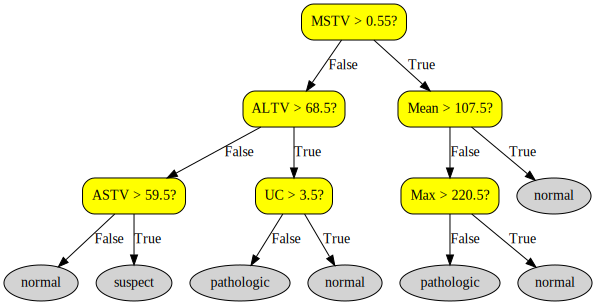

In [ ]:
clf = TreeClassifier(max_depth = 3, criterion = "gini")
clf.fit(Xtrain, Ytrain)
clf.draw_tree()

---
# Task 3

Import the data

In [ ]:
alldata = pd.read_csv("data/sberbank.csv")
alldata.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [ ]:
# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
  return int(timestamp[:4])

  
alldata['year'] = alldata.timestamp.apply(get_year)
# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()
# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)
# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

In [ ]:
# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00421309, 0.00192046, 0.00193977, 0.00181317, 0.0012598 ]),
 'score_time': array([0.00064039, 0.00053501, 0.00047493, 0.00034714, 0.00035739]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [ ]:
#instantiate all regressor
lr = LinearRegression()
ridge = Ridge()
lasso  =  Lasso()
dtr =  DecisionTreeRegressor()
rfr =  RandomForestRegressor()
gbr =  GradientBoostingRegressor()
mlpr =  MLPRegressor()

In [ ]:
regressors = [lr,ridge,lasso,dtr,rfr,gbr,mlpr]

In [ ]:
#params for regressors
param_lr = {}
param_ridge = {'alpha': [1,0.1,0.01,0.001,0.0001] }
param_lasso = {'alpha':[1,0.1,0.01,0.001,0.0001]}
param_dtr = {"criterion" :  ["squared_error", "friedman_mse"],"max_depth":range(1,20)}
param_rfr = {"criterion" :  ["squared_error", "friedman_mse"],"max_depth":range(1,20,2),"n_estimators":range(100,1000,300)}
param_gbr = {"loss":['squared_error', 'absolute_error'],"learning_rate":[0.001,0.01,0.1], "n_estimators":range(1000,2000,500)}
param_mlpr = {'hidden_layer_sizes': [(100,20), (200,100)]}
# ,
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']
# }
params_list_r = [param_lr,param_ridge,param_lasso,param_dtr,param_rfr,param_gbr,param_mlpr]

In [ ]:
best_reg = ""
best_score = -1
best_parameters = {}

for reg, params in zip(regressors,params_list_r):  
    print(f"Testing parameters for {reg}")
    grid = GridSearchCV(estimator=reg, param_grid=params, verbose=0, cv=5,scoring='neg_mean_squared_error').fit(Xtrain,Ytrain)
    if grid.best_score_ > best_score :
        best_reg = grid.best_estimator_
        best_score = grid.best_score_
        best_parameters = grid.best_params_

Testing parameters for LinearRegression()
Testing parameters for Ridge()
Testing parameters for Lasso()
Testing parameters for DecisionTreeRegressor()
Testing parameters for RandomForestRegressor()
Testing parameters for GradientBoostingRegressor()
Testing parameters for MLPRegressor()


In [ ]:
print('best estimator: ', best_reg)
print('best parameter values: ', best_parameters)
print('best score: ', best_score) 

best estimator:  GradientBoostingRegressor(n_estimators=1000)
best parameter values:  {'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 1000}
best score:  -0.25590945567987633


In [ ]:
regr = GradientBoostingRegressor(learning_rate=0.1,loss='squared_error',n_estimators = 1000)
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

0.26110094838507875

Gradient boosting regressor was the best performing algorithm with the highest negative mean squared error(-0.256) on the training dataset and using the mean squared error metric, an evaluation score of 0.261 was obtained on the testing dataset.


**Gradient boosting regressor :** 
It works in a similar way to what was described in Task 1, that it is a boosting algorithm which constructs ensembles in a sequential way and corrects error of the last step. Gradient boosting adds sub-models based on a gradient descent principle. That is, it tries to optimize the boosted ensemble against a certain loss function by minimizing the squared error.

---

# Task 4 

Step 1. Implementing the regression model 

In [ ]:
class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth = 10, criterion = "variance_reduction", variance_threshold = 0.1):
        super().__init__(max_depth)
        self.criterion = criterion
        self.variance_threshold= variance_threshold
    

    def fit(self, X, Y):
        # For decision tree classifiers we use the variance reduction method to 
        # measure the homogeneity of subsets.
        if self.criterion == "variance_reduction":
            self.criterion_function = variance_reduction_scorer
        else:
            raise Exception(f"Invalid criterion: {self.criterion}")
        
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean value
    def get_default_value(self, Y):
        return np.mean(Y)
    
    # Checks whether a set of output values is homogeneous. In the 
    # classification case, this means that all output values are identical.
    # If the data contains just one item, this means that the set is 
    # homogeneous.
    def is_homogeneous(self, Y):
        if len(Y) < 2: 
          True
        else:
          return np.var(Y) < self.variance_threshold

        

    # Finds the best splitting point for a given feature.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        if n < 2:
          return self.get_default_value(Y), None, None

        total_sum = sum(Y_sorted)
        total_sum_squares = sum(y ** 2 for y in Y_sorted)
        total_variance = (1.0 / n) * total_sum_squares - (1.0 / (n ** 2)) * (total_sum ** 2)

        # keep track of low and high parts
        low_n = 0.0
        high_n = float(n)

        # keep track of sum of low and high parts
        low_sum = 0
        high_sum = total_sum

        # keep track of sum of low and high parts
        # keep track of sum of squares of low and high parts
        low_sum_squares = 0
        high_sum_squares = total_sum_squares

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(n-1):
            # update low and high parts
            low_n += 1.0
            high_n -= 1.0

            # get y-value at split
            y_i = Y_sorted[i]

            # update sum and sum of squares of low part by adding
            low_sum += y_i
            low_sum_squares += y_i**2

            # update sum and sum of squares of high part by subtracting
            high_sum -= y_i
            high_sum_squares -= y_i**2

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            # x_next = XY[i+1][0]
            x_i = X_sorted[i]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(total_variance, n, high_n, high_sum, high_sum_squares, low_n, low_sum, low_sum_squares)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return self.get_default_value(Y), None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [ ]:
def variance_reduction_scorer(total_variance, n, high_n, high_sum, high_sum_squares, low_n, low_sum, low_sum_squares):
    # calculate parts of variance reduction algorithm.
    high_variance = (1.0/high_n)*high_sum_squares - (1.0/(high_n**2)) * (high_sum**2)
    low_variance =  (1.0/low_n)*low_sum_squares   - (1.0/(low_n**2))  * (low_sum**2)

    return total_variance - (high_n/n)*high_variance - (low_n/n)*low_variance

## Step 2. Sanity check

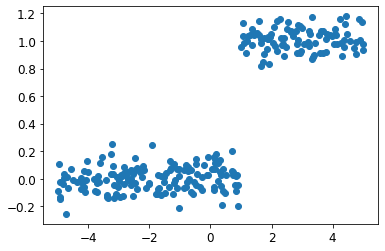

In [ ]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(250)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
plt.scatter(X, Y) ;

In [ ]:
#Train your decision tree regressor algorithm on a small dataset generated by the function above, and then draw the tree

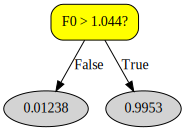

In [ ]:
rgr = TreeRegressor(max_depth = 1)
rgr.fit(Xtrain, Ytrain)
rgr.draw_tree()


> Our initial selection of max_depth was 1 since the data is clustered at two places and it has a low variance at both places,performing one split allows us to obtain two outputs which is the mean of the points in both clusters such that the new variance is low enough to stop the recursion. 

> Plotting the output of the decision gave us some intuition about what value to set the threshold and to understand better how the algorithm is working behind the scenes and what is its effect for greater max_depth values







The decision tree has univariate inputs,so it is possible to plot its outputs as shown below.(We used code from the [jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb) of the book  *Hands-On Machine Learning with Scikit-Learn and TensorFlow
by Aurélien Géron* and adapted it to our needs to plot the output of the decision tree regressor)

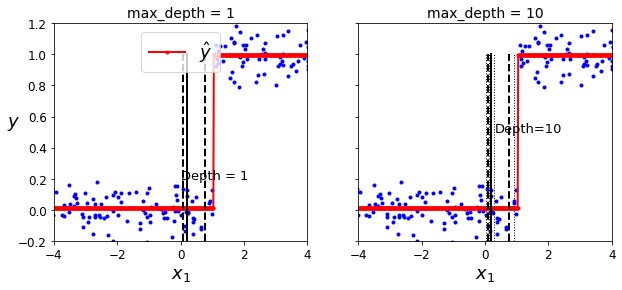

In [ ]:
tree_reg1 = TreeRegressor(max_depth=1)
tree_reg2 = TreeRegressor(max_depth=10)
tree_reg1.fit(Xtrain,Ytrain )
tree_reg2.fit(Xtrain, Ytrain)

def plot_regression_predictions(tree_reg, X, y, axes=None, ylabel="$y$"):
    if axes is None:
        axes = [-4, 4, -0.2, 1.2]
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize = 18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey = True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, Xtrain, Ytrain)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth = 2)
# plt.text(0.21, 0.65, "Depth = 0", fontsize = 15)
plt.text(0.01, 0.2, "Depth = 1", fontsize = 13)
# plt.text(0.65, 0.8, "Depth = 1", fontsize = 13)
plt.legend(loc="upper center", fontsize = 18)
plt.title("max_depth = 1", fontsize = 14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, Xtrain, Ytrain, ylabel = None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth = 2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth = 1)
plt.text(0.3, 0.5, "Depth=10", fontsize = 13)
plt.title("max_depth = 10", fontsize = 14)

plt.show()


> From the plot we could see that,decision trees regressor are defined by functions which are piecewise constants that is the output(red horizontal line) is constant in intervals, and after crossing a certain threshold(vertical red line),there is an abrupt switch to the new output. This allowed us to know what range of values should the varience threshold be such that there are two outputs.








What happens if we allow the tree depth to be a large number?

> Looking at the data,one split should be enough since after the split,
the data is homogeneous hence increasing the max_depth(for e.g max_depth = 2 or max_depth = 10) should give only one split similar to max_depth = 1 as shown below. 





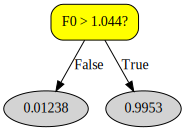

In [ ]:
# testing for bigger max_depth values
rgr = TreeRegressor(max_depth = 2)
rgr.fit(Xtrain, Ytrain)
rgr.draw_tree()

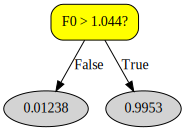

In [ ]:
# testing for bigger max_depth values
rgs = TreeRegressor(max_depth = 10)
rgs.fit(Xtrain, Ytrain)
rgs.draw_tree()

# Step 3. Predicting apartment prices using decision tree regression

Train and evaluate a decision tree regression model for the Russian apartment price predictionexample.

In [ ]:
#we call the data again to re assign the x and y

In [ ]:
alldata = pd.read_csv("data/sberbank.csv")
alldata.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [ ]:
# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
  return int(timestamp[:4])

  
alldata['year'] = alldata.timestamp.apply(get_year)
# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()
# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)
# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

In [ ]:
# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
reg_tr = [TreeRegressor()]
params_tr = [{"max_depth":range(13)}]

best_reg = ""
best_score = -1
best_parameters = {}

for reg, params in zip(reg_tr,params_tr):  
    print("Testing parameters for {}".format(reg))
    grid = GridSearchCV(estimator=reg, param_grid=params, verbose=0, cv=5,scoring='neg_mean_squared_error').fit(Xtrain,Ytrain)
    if grid.best_score_ > best_score :
        best_reg = grid.best_estimator_
        best_score = grid.best_score_
        best_parameters = grid.best_params_

Testing parameters for TreeRegressor()


In [ ]:
print('best estimator: ', best_reg)
print('best parameter values: ', best_parameters)
print('best score: ', best_score)

best estimator:  TreeRegressor(max_depth=6)
best parameter values:  {'max_depth': 6}
best score:  -0.2809528626313673


In [ ]:
reg = TreeRegressor(max_depth = 6)
reg.fit(Xtrain, Ytrain)

In [ ]:
mean_squared_error(Ytest, reg.predict(Xtest))

0.28643634372540716

We used a max_depth of 6 which gave evaluation scores : 


*   Training dataset(negative mean squared error) : -0.28
*   Testing dataset(mean squared error) : 0.29

---



---






# Step 4. Underfitting and overfitting

This time, we carry out the training evaluation without cross-validation.

In [ ]:
def find_max_depth_reg(depth_range, Xtrain, Xtest, Ytrain, Ytest):
    max_depth_list = list(range(depth_range))

    train_scores = [] # Log training cross validation scores for each model
    test_scores = [] # Log testing cross validation scores for each model

    for x in max_depth_list:
        reg = TreeRegressor(max_depth = x) 
        reg.fit(Xtrain, Ytrain)
        train_scores.append(mean_squared_error(Ytrain, reg.predict(Xtrain)))
        test_scores.append(mean_squared_error(Ytest, reg.predict(Xtest)))
    
    return (train_scores, test_scores)

In [ ]:
reg_scores = find_max_depth_reg(13, Xtrain, Xtest, Ytrain, Ytest)

In [ ]:
 #¨Plot from max_depth 0 to 12 (inclusive)

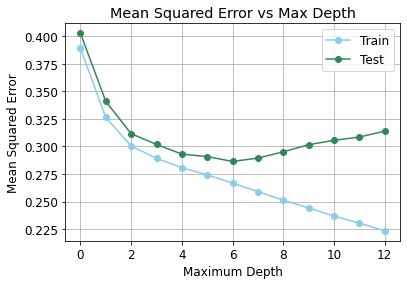

In [ ]:
x = np.arange(13) # Create domain for plot
plt.rc("font", size = 12) # Set font size to 12

plt.plot(x, reg_scores[0], label = 'Train', color = 'skyblue', marker = 'o', markerfacecolor = 'skyblue') # Plot training score over domain
plt.plot(x, reg_scores[1], label = 'Test', color = 'seagreen', marker = 'o', markerfacecolor = 'seagreen') # Plot testing accuracy over domain
plt.title('Mean Squared Error vs Max Depth') # Title
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Mean Squared Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.grid(axis = "x")
plt.grid(axis = "y") # Show grid x-axis lines

plt.show()

We try to compare our model with the one from sklearn to see the difference how the mean squared error changes as max_depth changes.

In [ ]:
def find_max_depth_sk(depth_range, Xtrain, Xtest, Ytrain, Ytest):
    #sklearn doesn't have accept max_depth = 0
    max_depth_list = list(range(1,depth_range))

    train_scores = [] # Log training cross validation scores for each model
    test_scores = [] # Log testing cross validation scores for each model

    for x in max_depth_list:
        reg = DecisionTreeRegressor(max_depth = x) 
        reg.fit(Xtrain, Ytrain)
        train_scores.append(mean_squared_error(Ytrain, reg.predict(Xtrain)))
        test_scores.append(mean_squared_error(Ytest, reg.predict(Xtest)))
    
    return (train_scores, test_scores)

In [ ]:
reg_scores_sk = find_max_depth_sk(13, Xtrain, Xtest, Ytrain, Ytest)

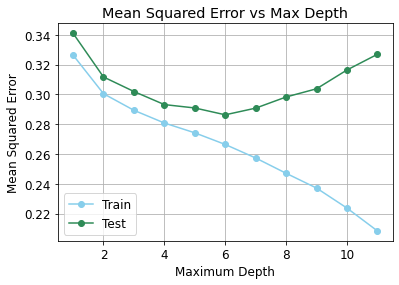

In [ ]:
x = np.arange(11) + 1 # Create domain for plot
plt.rc("font", size = 12) # Set font size to 12

plt.plot(x, reg_scores_sk[0], label = 'Train', color = 'skyblue', marker = 'o', markerfacecolor = 'skyblue') # Plot training score over domain
plt.plot(x, reg_scores_sk[1], label = 'Test', color = 'seagreen', marker = 'o', markerfacecolor = 'seagreen') # Plot testing accuracy over domain
plt.title('Mean Squared Error vs Max Depth') # Title
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Mean Squared Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.grid(axis = "x")
plt.grid(axis = "y") # Show grid x-axis lines

plt.show()

> We can see similar patterns between our version of the regressor and the one from sklearn

*   The gap between the train and test score as max depth increases
*   A 'U-shape' starts to form from test scores as max depth increases

> This gap between training and test scores is called generalisation gap, The training error 
decreases as the model complexity increases, whereas the new data error typically has a U-shape.
As the complexity of the model increases(by increasing the max_depth), the training error decreases whereas the test error is larger since the model becomes so complex and very peculiar to specific instances that it performs poorly on new data. This is referred as overfitting and the opposite would be underfitting which we could observe for max depths of 0-5. Ideally we look for balanced fit(in this case max_depth=6) by performing hyperparameter tuning.
